In [13]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from utils import *

# Functions

In [26]:
tool_list=["optitype",'T1K','hlahd',"arcas",'hisat',"rna2hla","seq2hla","phlat","hlaforest","hlavbseq",'hlaminer']

missed_alleles = []

for t in tool_list:
    missed_alleles_caller = []
    for i in range(1,7):
        gs=pd.read_csv(f"../datasets/{i}_gs.csv")
        pre=pd.read_csv(f"../results/standard/{t}_d{i}.csv")
        
        for gene in ["A", "B", "C", "DQB1", "DRB1"]:
            target = gene + ".1"
            if (target not in pre.columns):
                continue
            pre[target].fillna(pre[gene], inplace=True)
    
        ret = get_inaccurate_and_all_alleles(pre,gs)
        missed_alleles_caller.append(ret[0])
    missed_alleles.append(missed_alleles_caller)



In [27]:
mis_total = []
all_total = np.array([1084, 1080, 1088, 1180, 980]) #5 element vector with # of gold standard A, B, C, DRB, and DQB

for tool in missed_alleles:
    mis_counts = [0,0,0,0,0]
    for d in tool:
        for allele in d:
            if allele[0] == "A":
                mis_counts[0]+=1
            if allele[0] == "B":
                mis_counts[1] += 1
            if allele[0] == 'C':
                mis_counts[2] += 1
            if allele[0:2] == 'DR':
                mis_counts[3] += 1
            if allele[0:2] == 'DQ':
                mis_counts[4] += 1
    mis_total.append(mis_counts)

percentage = mis_total/all_total
print(percentage)
accuracy = 1-percentage
print(accuracy)

[[0.00276753 0.01018519 0.00367647 0.         0.        ]
 [0.00553506 0.01111111 0.00643382 0.01440678 0.00306122]
 [0.00369004 0.01481481 0.02665441 0.02627119 0.00408163]
 [0.01383764 0.01481481 0.01470588 0.02627119 0.00306122]
 [0.0202952  0.01666667 0.05055147 0.03474576 0.01428571]
 [0.00369004 0.0212963  0.02022059 0.06779661 0.        ]
 [0.00369004 0.0212963  0.02022059 0.10254237 0.07040816]
 [0.00830258 0.05833333 0.02481618 0.02457627 0.39591837]
 [0.01476015 0.07592593 0.01286765 0.02457627 0.02653061]
 [0.08210332 0.11388889 0.09558824 0.88220339 0.95714286]
 [0.78413284 0.85555556 0.77297794 0.7779661  0.56734694]]
[[0.99723247 0.98981481 0.99632353 1.         1.        ]
 [0.99446494 0.98888889 0.99356618 0.98559322 0.99693878]
 [0.99630996 0.98518519 0.97334559 0.97372881 0.99591837]
 [0.98616236 0.98518519 0.98529412 0.97372881 0.99693878]
 [0.9797048  0.98333333 0.94944853 0.96525424 0.98571429]
 [0.99630996 0.9787037  0.97977941 0.93220339 1.        ]
 [0.99630996 

# Plots

In [28]:
df = pd.DataFrame(mis_total)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

,A,B,C,DRB1,DQB1
optitype,3,11,4,0,0
T1K,6,12,7,17,3
hlahd,4,16,29,31,4
arcas,15,16,16,31,3
hisat,22,18,55,41,14
rna2hla,4,23,22,80,0
seq2hla,4,23,22,121,69
phlat,9,63,27,29,388
hlaforest,16,82,14,29,26
hlavbseq,89,123,104,1041,938


In [29]:
df = pd.DataFrame(percentage)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

,A,B,C,DRB1,DQB1
optitype,0.002768,0.010185,0.003676,0.000000,0.000000
T1K,0.005535,0.011111,0.006434,0.014407,0.003061
hlahd,0.003690,0.014815,0.026654,0.026271,0.004082
arcas,0.013838,0.014815,0.014706,0.026271,0.003061
hisat,0.020295,0.016667,0.050551,0.034746,0.014286
rna2hla,0.003690,0.021296,0.020221,0.067797,0.000000
seq2hla,0.003690,0.021296,0.020221,0.102542,0.070408
phlat,0.008303,0.058333,0.024816,0.024576,0.395918
hlaforest,0.014760,0.075926,0.012868,0.024576,0.026531
hlavbseq,0.082103,0.113889,0.095588,0.882203,0.957143


<AxesSubplot:>

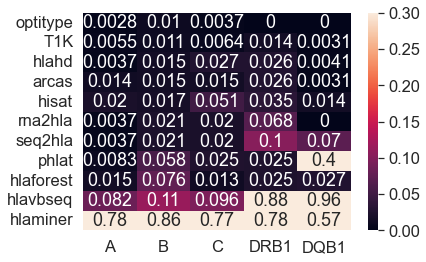

In [30]:
df = pd.DataFrame(percentage)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

from matplotlib.colors import LogNorm, Normalize
sns.heatmap(df,annot=True,vmin=0,vmax=0.3)

Text(0.5, 1.0, 'Accuracy')

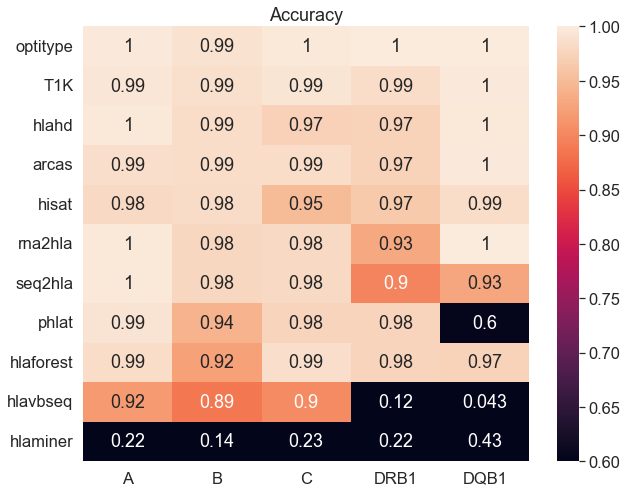

In [31]:
df = pd.DataFrame(accuracy)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=1.5)

my_order=["Optitype","T1K","HLA-HD","arcasHLA","HISAT","rna2HLA","seq2HLA","PHLAT","HLAforest","HLA-vbseq",'HLAminer']


from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(10,8))
sns.heatmap(df,annot=True,vmin=0.6,vmax=1)

plt.title('Accuracy')